# Task: Perform a basic exploration of the cleaned data to understand its structure and key characteristics.

- Basic summary statistics of the dataset (mean, variance, min, max, etc.).
- Visualization of feature distributions (histograms, box plots, etc.).
- Correlation analysis between different features and target variables (correlation matrix, heatmaps).
- Brief discussion on any patterns or insights observed during the analysis.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import xarray as xr

In [ ]:
# let's look at some histograms for the data
all_sd = np.array([])
aso_lidar_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\ASO_50m_SD_cleaned\*\*"
for f in tqdm(glob.glob(aso_lidar_path)):
    f = os.path.normpath(f)
    aso_ds = xr.open_dataset(f).squeeze()
    aso_ds = aso_ds.rename({'band_data': 'aso_sd'})
    aso_ds['aso_sd'] = aso_ds['aso_sd'].where(aso_ds['aso_sd'] >= 0)
    arr = aso_ds['aso_sd'].values.flatten()
    arr = arr[~np.isnan(arr)]
    all_sd = np.append(all_sd, arr)

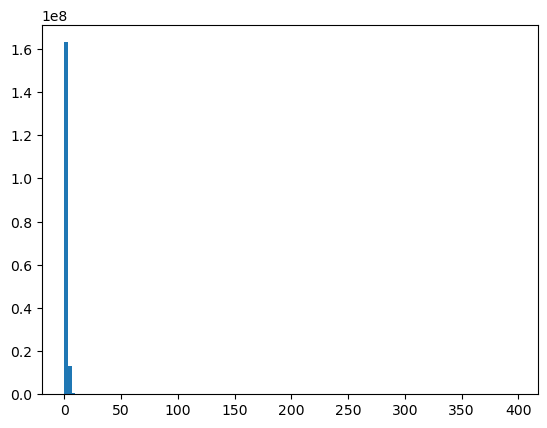

In [79]:
# we see here that we have some outliers, let's subset the data to remove them
plt.hist(all_sd, bins=np.linspace(all_sd.min(), all_sd.max(), 127))
plt.show()

In [82]:
len(all_sd) - len(all_sd[all_sd < 10])

75442

In [83]:
len(all_sd) - len(all_sd[all_sd < 20])

760

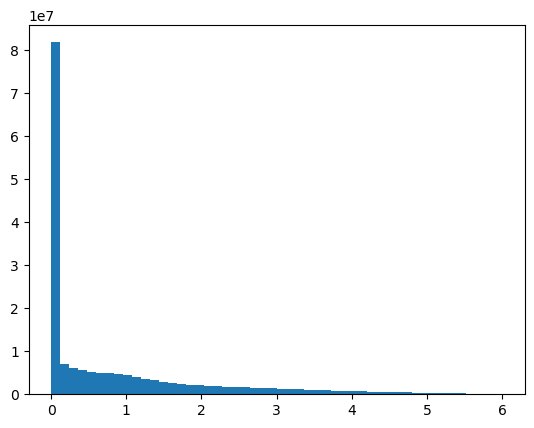

In [86]:
plt.hist(all_sd, bins=np.linspace(all_sd.min(), 6, 51))
plt.show()

---

In [87]:
# let's look at some histograms for the data
all_dem = np.array([])
cop30_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\cop30\*"
for f in tqdm(glob.glob(cop30_path)):
    f = os.path.normpath(f)
    dem_ds = xr.open_dataset(f).squeeze()
    dem_ds = dem_ds.rio.write_crs(aso_ds.rio.crs)
    dem_ds = dem_ds.rename({'__xarray_dataarray_variable__': 'elevation'})
    arr = dem_ds['elevation'].values.flatten()
    arr = arr[~np.isnan(arr)]
    all_dem = np.append(all_dem, arr)

100%|██████████| 252/252 [02:58<00:00,  1.41it/s]


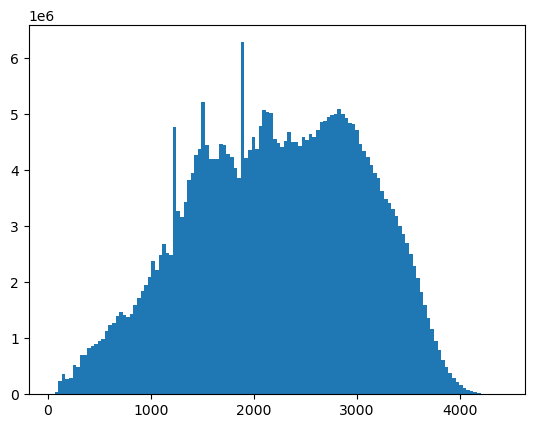

In [91]:
plt.hist(all_dem, bins=np.linspace(all_dem.min(), all_dem.max(), 127))
plt.show()

In [92]:
# let's look at some histograms for the data
all_dem = np.array([])
cop30_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\cop30\*"
for f in tqdm(glob.glob(cop30_path)):
    f = os.path.normpath(f)
    dem_ds = xr.open_dataset(f).squeeze()
    dem_ds = dem_ds.rio.write_crs(aso_ds.rio.crs)
    dem_ds = dem_ds.rename({'__xarray_dataarray_variable__': 'elevation'})
    arr = dem_ds['elevation'].values.flatten()
    arr = arr[~np.isnan(arr)]
    max_elev = arr.max()
    min_elev = arr.min()
    arr_range= max_elev - min_elev
    all_dem = np.append(all_dem, arr_range)

100%|██████████| 252/252 [00:09<00:00, 26.43it/s]


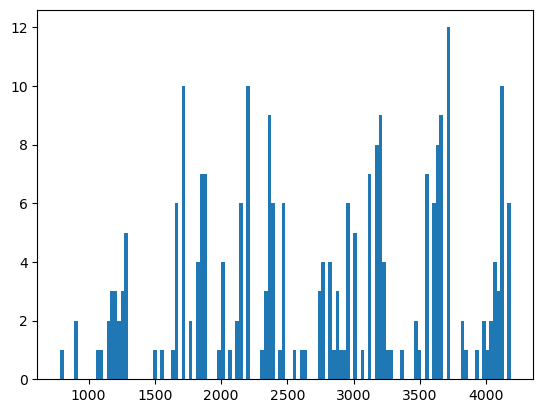

In [93]:
plt.hist(all_dem, bins=np.linspace(all_dem.min(), all_dem.max(), 127))
plt.show()

---

In [96]:
# let's look at some histograms for the data
all_son_vv, all_son_vh, all_soff_vv, all_soff_vh = np.array([]), np.array([]), np.array([]), np.array([])
snowon_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\S1_rtc\S1_snow-on*.nc"
snowoff_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\S1_rtc\S1_snow-off*.nc"
for f1, f2 in zip(glob.glob(snowon_path), glob.glob(snowoff_path)):
    f1, f2 = os.path.normpath(f1), os.path.normpath(f2)
    S1_snowon_ds = xr.open_dataset(f1).squeeze()
    S1_snowon_ds = S1_snowon_ds.rename({'vv': 'snowon_vv', 'vh':'snowon_vh'})

    S1_snowoff_ds = xr.open_dataset(f2).squeeze()
    S1_snowoff_ds = S1_snowoff_ds.rename({'vv': 'snowoff_vv', 'vh':'snowoff_vh'})

    arr1 = S1_snowon_ds['snowon_vv'].values.flatten()
    arr1 = arr1[~np.isnan(arr1)]
    all_son_vv = np.append(all_son_vv, arr1)
    arr2 = S1_snowon_ds['snowon_vh'].values.flatten()
    arr2 = arr2[~np.isnan(arr2)]
    all_son_vh = np.append(all_son_vh, arr2)

    arr3 = S1_snowoff_ds['snowoff_vv'].values.flatten()
    arr3 = arr3[~np.isnan(arr3)]
    all_soff_vv = np.append(all_soff_vv, arr3)
    arr4 = S1_snowoff_ds['snowoff_vh'].values.flatten()
    arr4 = arr4[~np.isnan(arr4)]
    all_soff_vh = np.append(all_soff_vh, arr4)

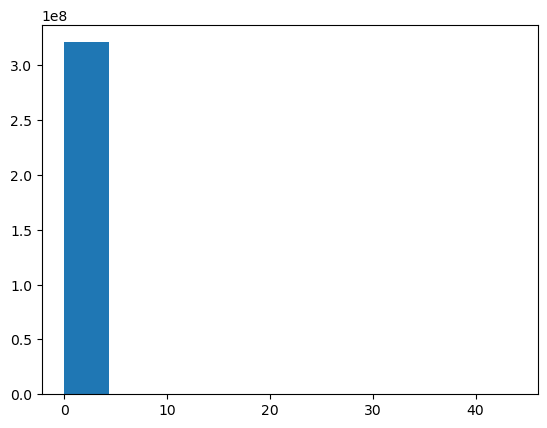

In [99]:
# sentinel-1 snow-off vh
plt.hist(all_soff_vh)
plt.show()

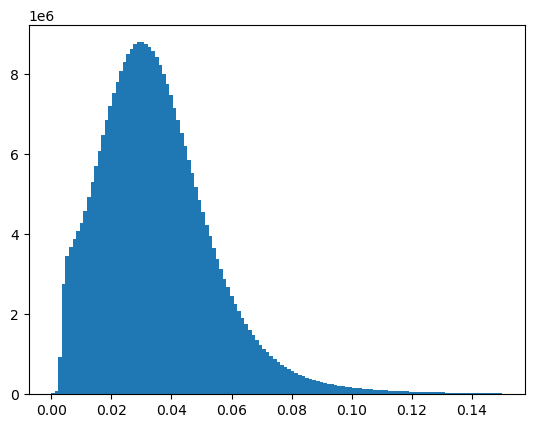

In [103]:
# sentinel-1 snow-off vh
plt.hist(all_soff_vh, bins = np.linspace(all_soff_vh.min(), 0.15, 127))
plt.show()

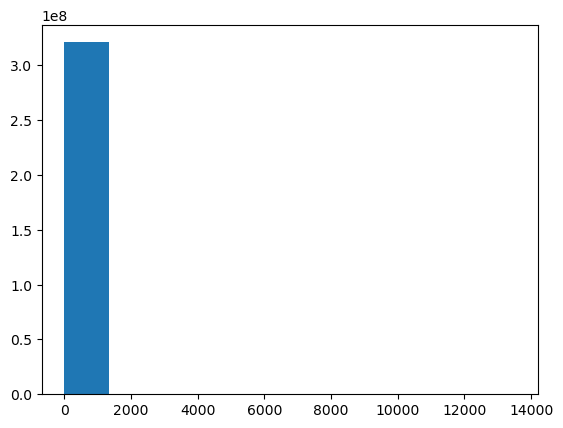

In [104]:
# sentinel-1 snow-off vv
plt.hist(all_soff_vv)
plt.show()

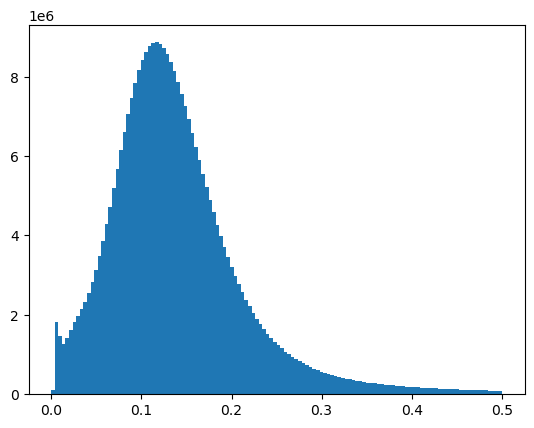

In [110]:
# sentinel-1 snow-off vv
plt.hist(all_soff_vv, bins=np.linspace(all_soff_vv.min(), 0.5, 127))
plt.show()

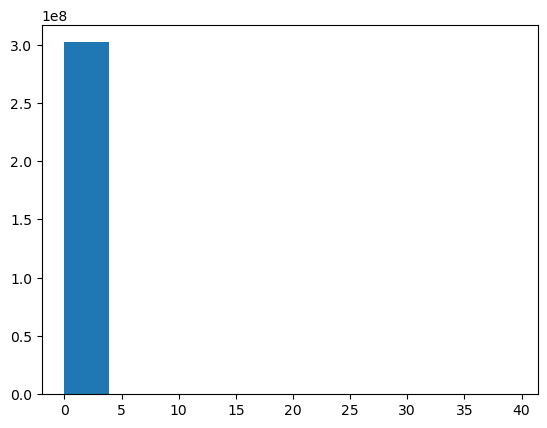

In [108]:
# sentinel-1 snow-on vh
plt.hist(all_son_vh)
plt.show()

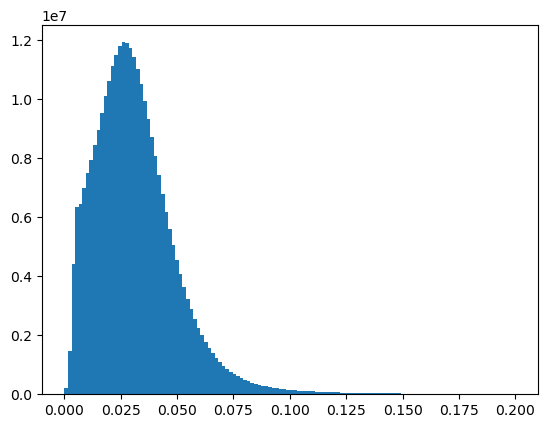

In [111]:
# sentinel-1 snow-on vh
plt.hist(all_son_vh, bins=np.linspace(all_son_vh.min(), 0.2, 127))
plt.show()

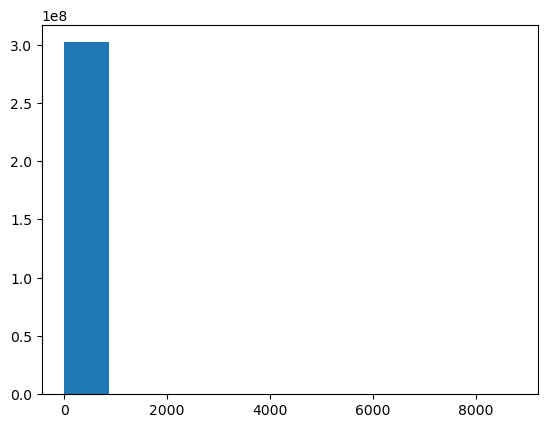

In [109]:
# sentinel-1 snow-on vv
plt.hist(all_son_vv)
plt.show()

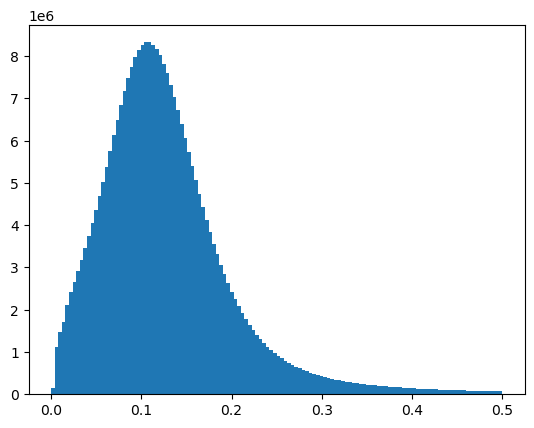

In [112]:
# sentinel-1 snow-on vv
plt.hist(all_son_vv, bins=np.linspace(all_son_vv.min(), 0.5, 127))
plt.show()

---

In [113]:
import torch

In [114]:
# let's look at some histograms for the data
all_b, all_g, all_r = np.array([]), np.array([]), np.array([])
s2_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\sentinel_2\*"
for f in tqdm(glob.glob(s2_path)):
    f = os.path.normpath(f)
    S2_ds = xr.open_dataset(f).squeeze()
    # Convert the DataArray objects to PyTorch tensors
    B04 = S2_ds.B04.values.flatten()
    B03 = S2_ds.B03.values.flatten()
    B02 = S2_ds.B02.values.flatten()

    B04 = B04[~np.isnan(B04)]
    B03 = B03[~np.isnan(B03)]
    B02 = B02[~np.isnan(B02)]

    all_r = np.append(all_b, B04)
    all_g = np.append(all_g, B03)
    all_b = np.append(all_r, B02)

100%|██████████| 226/226 [08:56<00:00,  2.37s/it]


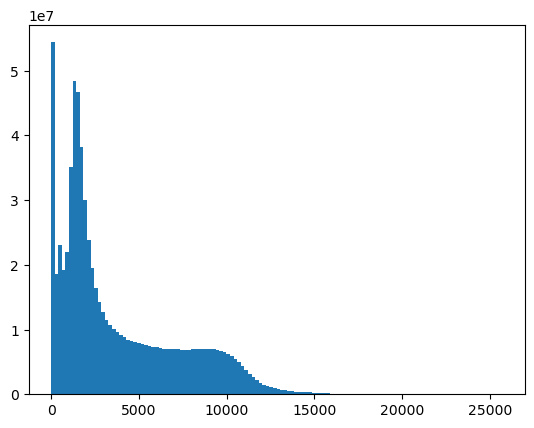

In [116]:
# sentinel-2 red band
plt.hist(all_r, bins=np.linspace(all_r.min(), all_r.max(), 127))
plt.show()

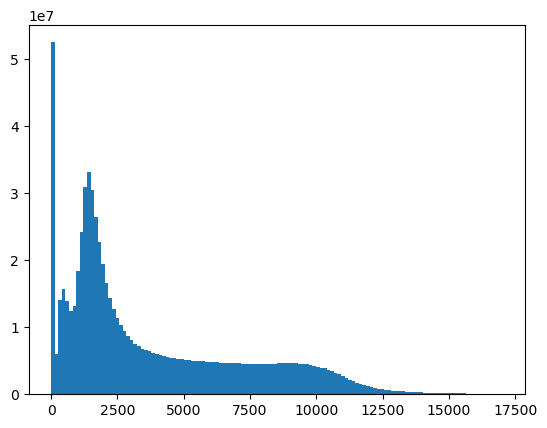

In [119]:
# sentinel-2 red band
plt.hist(all_r, bins=np.linspace(all_r.min(), 17000, 127))
plt.show()

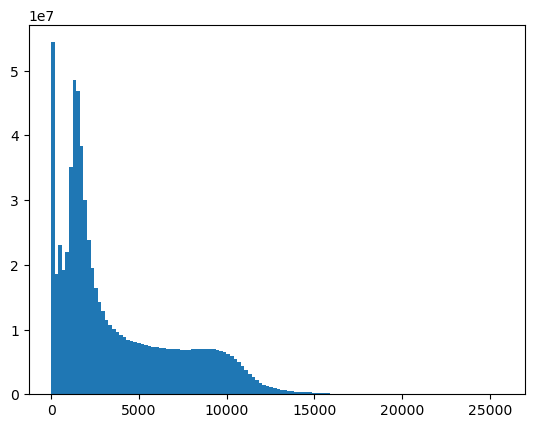

In [120]:
# sentinel-2 blue band
plt.hist(all_b, bins=np.linspace(all_b.min(), all_b.max(), 127))
plt.show()

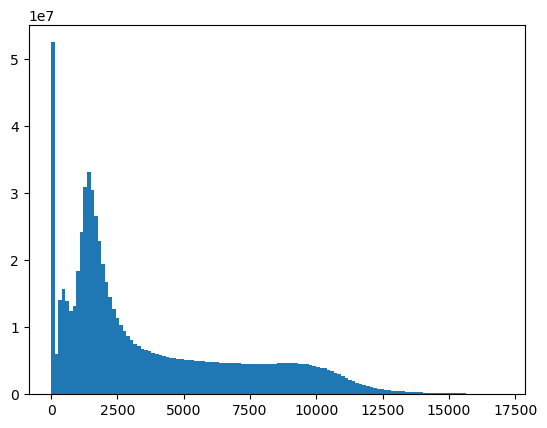

In [121]:
# sentinel-2 blue band
plt.hist(all_b, bins=np.linspace(all_b.min(), 17000, 127))
plt.show()

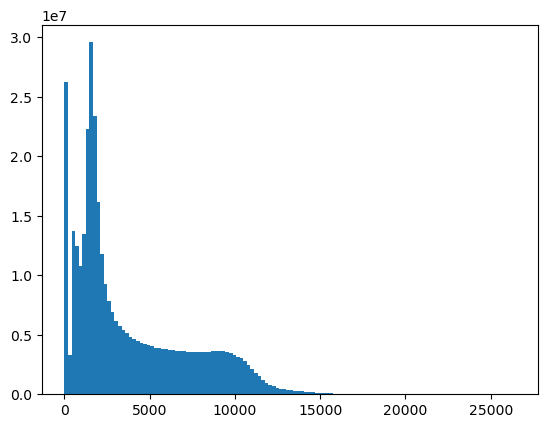

In [118]:
# sentinel-2 green band
plt.hist(all_g, bins=np.linspace(all_g.min(), all_g.max(), 127))
plt.show()

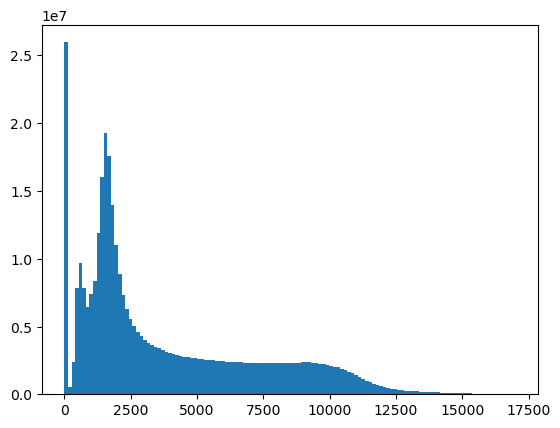

In [122]:
# sentinel-2 green band
plt.hist(all_g, bins=np.linspace(all_g.min(), 17000, 127))
plt.show()

---

In [ ]:
# let's look at some histograms for the data
all_fcf = np.array([])
fcf_path = r"C:\Users\JackE\uw\courses\aut24\ml_geo\final_data\fcf\*"
for f in tqdm(glob.glob(fcf_path)):
    f = os.path.normpath(f)
    fcf_ds = xr.open_dataset(f).squeeze()
    fcf_ds = fcf_ds.rename({'__xarray_dataarray_variable__': 'fcf'})
    arr = fcf_ds['fcf'].values.flatten()
    arr = arr[~np.isnan(arr)]
    all_fcf = np.append(all_fcf, arr)

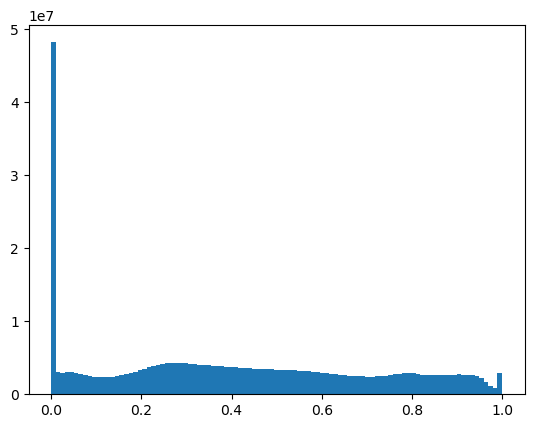

In [126]:
plt.hist(all_fcf, bins=np.linspace(0,1,100))
plt.show()

---

In [1]:
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
from glob import glob
import seaborn as sns

import deep_snow.dataset

In [2]:
# grab data paths
data_dir = '/mnt/c/Users/JackE/uw/courses/aut24/ml_geo/final_data/subsets_v4/train'
path_list = glob(f'{data_dir}/ASO_50M_SD*.nc')

In [7]:
# define data to be returned by dataloader
selected_channels = [
    # ASO products
    'aso_sd', # ASO lidar snow depth (target dataset)
    'aso_gap_map', # gaps in ASO data
    
    # Sentinel-1 products
    'snowon_vv', # snow on Sentinel-1 VV polarization backscatter in dB, closest acquisition to ASO acquisition
    'snowon_vh', # snow on Sentinel-1 VH polarization backscatter in dB, closest acquisition to ASO acquisition
    'snowoff_vv', # snow off Sentinel-1 VV polarization backscatter in dB, closest acquisition to ASO acquisition
    'snowoff_vh', # snow off Sentinel-1 VH polarization backscatter in dB, closest acquisition to ASO acquisition
    'snowon_cr', # cross ratio, snowon_vh - snowon_vv
    'snowoff_cr', # cross ratio, snowoff_vh - snowoff_vv
    'delta_cr', # change in cross ratio, snowon_cr - snowoff_cr
    'rtc_gap_map', # gaps in Sentinel-1 data
    
    # Sentinel-2 products 
    'aerosol_optical_thickness', # snow on Sentinel-2 aerosol optical thickness band 
    'coastal_aerosol', # snow on Sentinel-2 coastal aerosol band
    'blue', # snow on Sentinel-2 blue band
    'green', # snow on Sentinel-2 green band
    'red', # snow on Sentinel-2 red band
    'red_edge1', # snow on Sentinel-2 red edge 1 band
    'red_edge2', # snow on Sentinel-2 red edge 2 band
    'red_edge3', # snow on Sentinel-2 red edge 3 band
    'nir', # snow on Sentinel-2 near infrared band
    'water_vapor', # snow on Sentinel-2 water vapor
    'swir1', # snow on Sentinel-2 shortwave infrared band 1
    'swir2', # snow on Sentinel-2 shortwave infrared band 2
    'scene_class_map', # snow on Sentinel-2 scene classification product
    'water_vapor_product', # snow on Sentinel-2 water vapor product
    'ndvi', # Normalized Difference Vegetation Index from Sentinel-2
    'ndsi', # Normalized Difference Snow Index from Sentinel-2
    'ndwi', # Normalized Difference Water Index from Sentinel-2
    's2_gap_map', # gaps in Sentinel-2 data

    # PROBA-V global land cover dataset (Buchhorn et al., 2020)
    'fcf', # fractional forest cover
    
    # COP30 digital elevation model      
    'elevation',
    'slope',
    'aspect',
    'curvature',
    'tpi',
    'tri',

    # latitude and longitude
    'latitude',
    'longitude',

    # day of water year
    'dowy'
                    ]

In [8]:
train_data = deep_snow.dataset.Dataset(path_list, selected_channels, norm=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=True)

In [9]:
# let's just look into one training file
for i, data_tuple in enumerate(train_loader):
    data_dict = {name: tensor.squeeze() for name, tensor in zip(selected_channels, data_tuple)}
    break

In [ ]:
# Convert each tensor in the dictionary to a NumPy array
data_dict_np = {key: tensor.numpy().flatten() for key, tensor in data_dict.items()}
# Convert dictionary to DataFrame
df = pd.DataFrame(data_dict_np)
# calculate the correlation matrix
corr_matrix = df.corr()

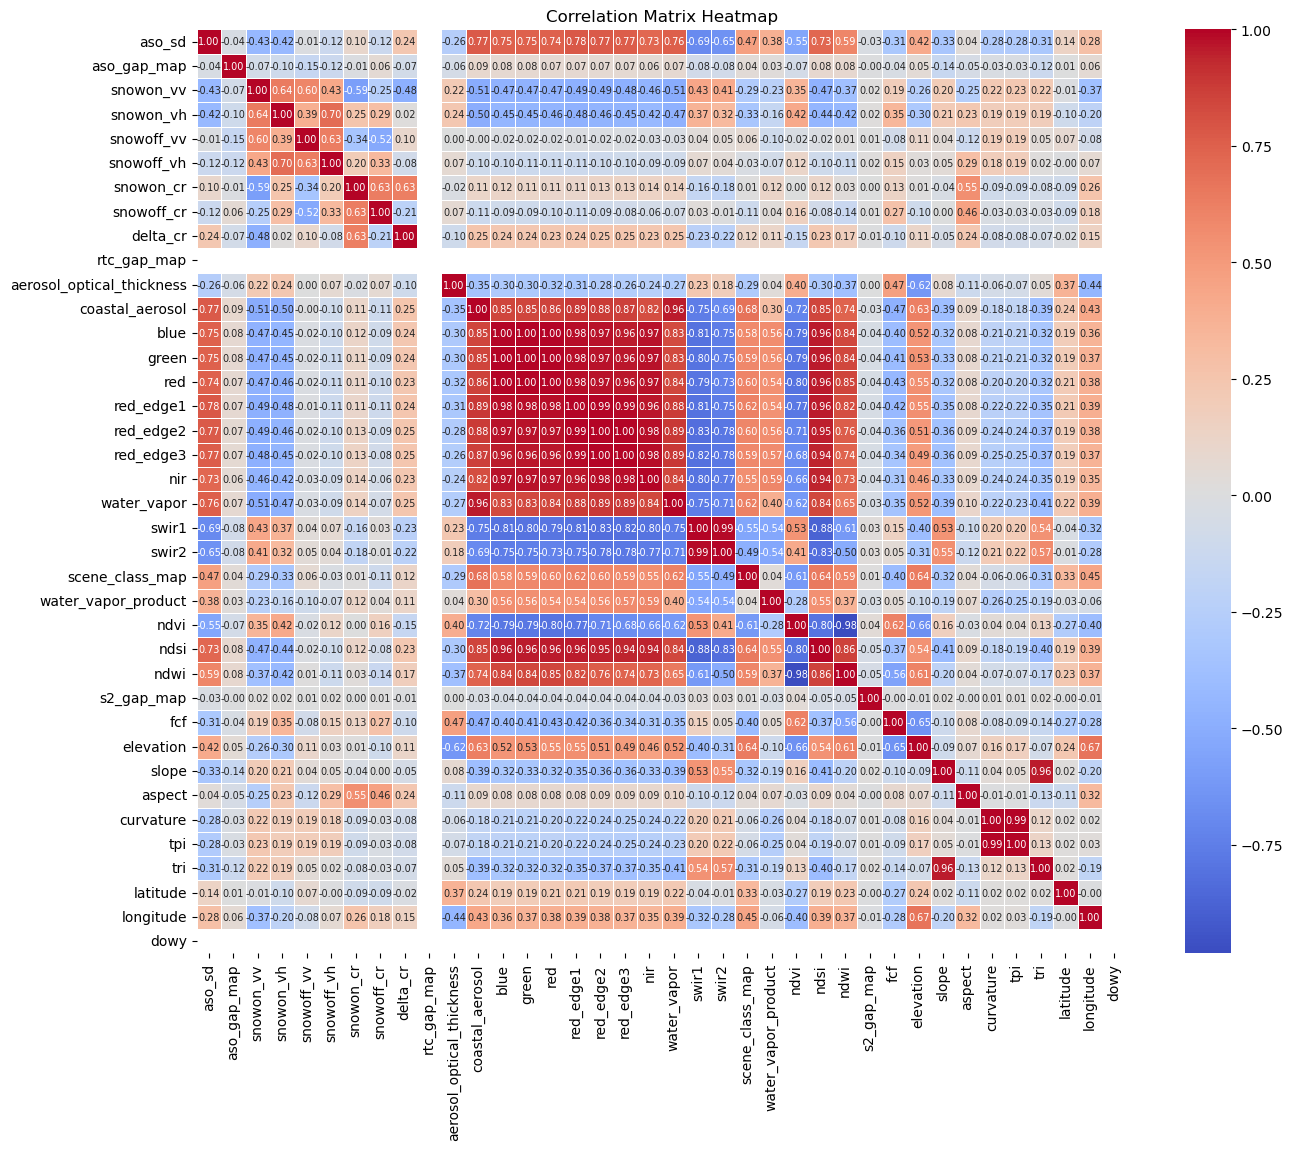

In [25]:
# plot heatmap for a singular training file
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",  linewidths=0.5, annot_kws={"size": 7})
plt.title("Correlation Matrix Heatmap")
plt.show()

---

We see from looking at our plots that most of the snow depth we'll be predicting is well under 1 meter of snow which makes sense. We see in the snow depth and sentinel-1 backscatter plots that we need to do some "sanity checks" - we know that there likely won't be places in our study area (50mx50m cells) that have a snow depth of hundreds of meters and we know there likely won't be cells with VV or VH polarization backscatter of 40+ dB, so we can remove some outliers in these variables (more data to clean). Our elevation data seems to be somewhat normally distributed centered around 2500m above the EGHM2008 ellipsoid which makes sense given the mountains we're working with. The histogram of the ranges of elevations is a lot more interesting though. We see there's great variation in these ranges of elevations, some 30mx30m cells having nearly a 5000m difference in elevation values. It will be interesting to see how the model performs over those areas of great range. The Sentinel-2 RGB bands all have similar distributions with heavy skews to the right. Lastly, the forest cover fraction histogram shows that a significant amount of the values lie between 0-0.01 which means mostly no forest cover, so I would expect the model to perform a lot better in predicting snow depth over areas of less forest cover.

TLDR: We need to handle anomalies and see model performance over large ranges of topographies and areas of high forest cover

In [ ]:
# For the heatmap:
# The spectral response of snow is bright for blue, red, green, and near infrared, so the covariance between indices and bands is not
# very surprising but definitely something we need to handle
# additionally, the backscatter-derived variables are all correlated as well (and elevation-derived variables) which was expected